# Exploratory Data Analysis
It’s a technique of exploring the data to get better understanding of it.

Gain insights by plotting different kinds of graphs using Python libraries, Seaborn, and Matplotlib.

# Heart attack analysis

We have data on patients seen by a cardiologist. The main goal of this notebook is to build a machine learning model, that will be able to predict the risk of a heart attack based on a patient's health condition.

Here we have the description of the features:

age - age in years

sex - sex (0 = female; 1 = male)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trtbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (0 = false; 1 = true)

restecg - resting electrocardiographic results (0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality)

thalachh - maximum heart rate achieved

exng - exercise induced angina (0 = no; 1 = yes)

oldpeak - ST depression induced by exercise relative to rest

slp - the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)

caa - number of major vessels (0-4) colored by flourosopy

thall - thallium stress test (1 = fixed defect; 2 = reversable defect; 3 = normal)

output - 0 = less chance of heart attack; 1 = more chance of heart attack

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the dataset
df=pd.read_csv('heart.csv')

### Basic EDA

In [ ]:
# Get the top 5 Records
df.head(7)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [ ]:
# Get the bottom 5 Records
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Get the number of rows & Columns
df.shape

(303, 14)

In [ ]:
# Get more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Get the list of columns
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
# Get the Statistical Information about the dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1.The dataset includes information about 303 patients.

2.There are 13 features. Even though all of them are numeric type, only 5 are really numerical, the rest are categorical.

            categorical features : sex, cp, fbs, restecg, exng, slp, caa, thall
   
            numerical features : age, trtbps, chol, thalachh, oldpeak

3.The target is output. 0 is low risk patient, 1 is high risk patient.

4.There are no missing values.

# Data Cleaning

In [ ]:
# Check for Null Values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
# Check for Duplicate Values
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


There is one duplicate we observed and delete it

In [ ]:
# Remove Duplicate Values
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(302, 14)

# Outlier
Outlier is an observation in a given dataset that lies far from the rest of the observations.
An outlier may occur due to the variability in the data, or due to experimental error/human error.



<Axes: >

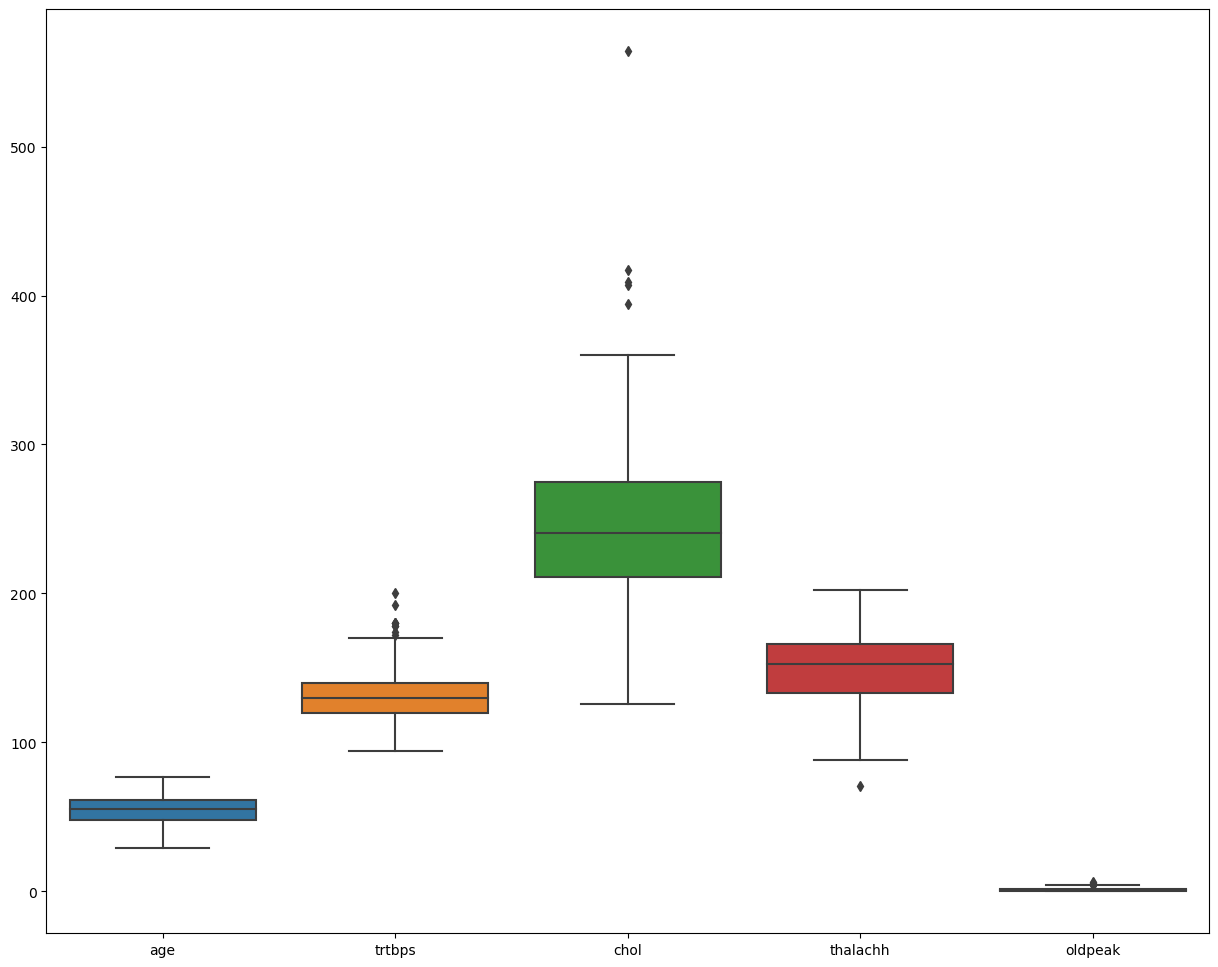

In [ ]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')

plt.figure(figsize=(15,12)) # Set the Width & Height
# df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])
sns.boxplot(data=df[['age','trtbps','chol','thalachh','oldpeak']])

In [ ]:
#Finding values of outliers(IQR method)
# 1. Sort the dataset in ascending order,
# 2 calculate the 1st and 3rd quartiles(Q1, Q3)
# 3  compute IQR=Q3-Q1,
# 4 compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR),
# 5 loop through the values of the dataset and check for those who fall below the lower bound
#and above the upper bound and mark them as outliers


![image.png](attachment:image.png)

No outliers are present in age attribute but there are outliers in trtbps, chol, thalachh and oldpeak attributes.
So we need to get the exact values of outliers using IQR method.

In [ ]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['age','trtbps','chol','thalachh','oldpeak']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in trtbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Outliers in chol attribute : [394, 407, 409, 417, 564]
Outliers in thalachh attribute : [71]
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]


## Observation
No outliers in age attribute

Outliers in trtbps attribute : 172, 174, 178, 178, 180, 180, 180, 192, 200

Outliers in chol attribute : 394, 407, 409, 417, 564

Outliers in thalachh attribute : 71

Outliers in oldpeak attribute : 4.2, 4.2, 4.4, 5.6, 6.2


Now we need to handle these outlier using Quantile based flooring and capping method.

In [ ]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['trtbps','chol','thalachh','oldpeak']:
    df[i]=handle_outliers(df[i])



<Axes: >

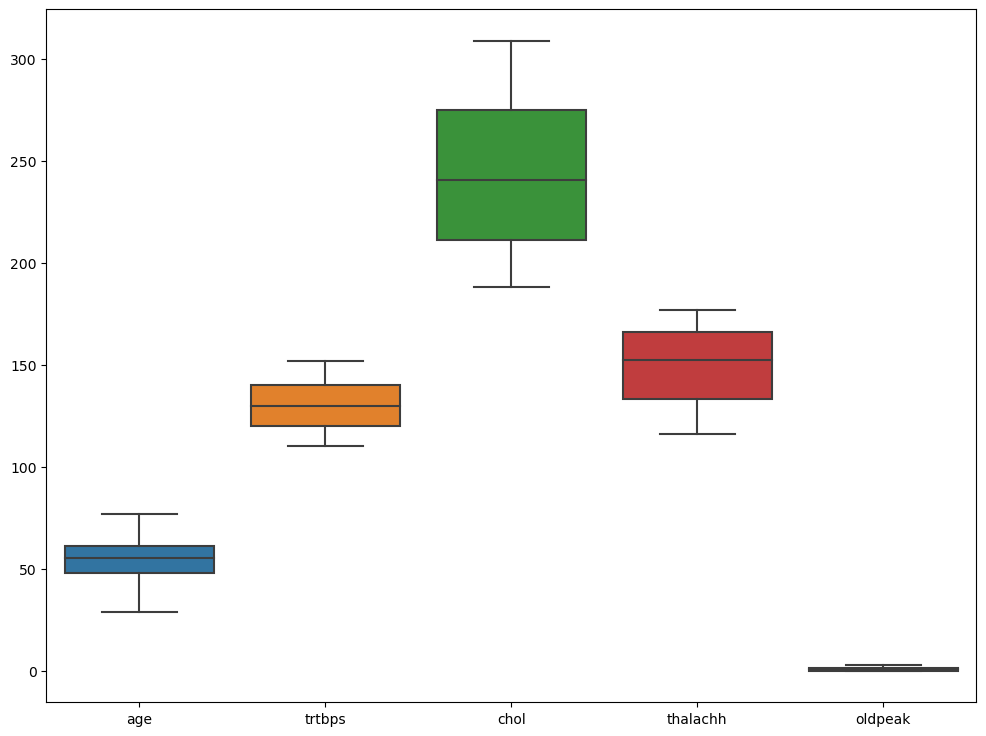

In [ ]:
# verifying again with boxplot

plt.figure(figsize=(12,9))
sns.boxplot(data=df[['age','trtbps','chol','thalachh','oldpeak']])

# Visualization

In this section, we will get an idea about our patients by considering all the features separately.

In [ ]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1


## Univariate Analysis

out of 302 54 % people suffer from attack


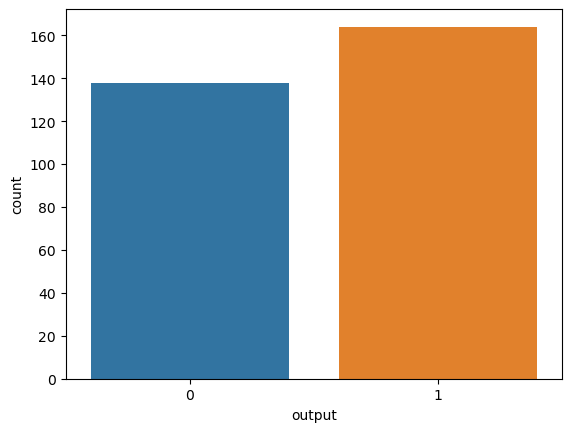

In [ ]:
# Output Column
#countplot is used to displays the count of observations for each category

# sns.countplot(data=df['output'])
sns.countplot(x= df['output'])

attack = round (df['output'].value_counts().values[0]/302*100)

# Observation
print('out of 302 {} % people suffer from attack'.format(attack))

out of 302 68 % patients are male


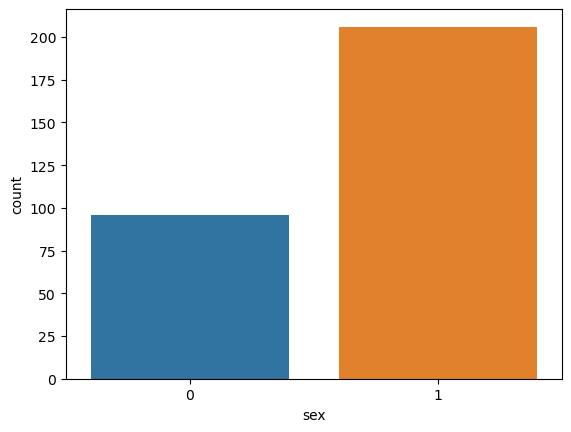

In [ ]:
# Sex Column
sns.countplot(x= df['sex'])

gender = round (df['sex'].value_counts().values[0]/302*100)

# Observation
print('out of 302 {} % patients are male'.format(gender))

out of 302 47 % patients do not have chest pain
out of 302 45 % patients have severe chest pain


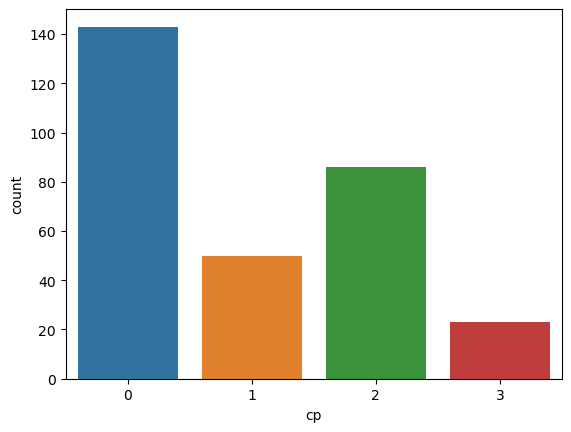

In [ ]:
# cp Column
sns.countplot(x= df['cp'])

no_chestpain = round (df['cp'].value_counts().values[0]/302*100)
chestpain = round ((df['cp'].value_counts().values[1] + df['cp'].value_counts().values[2]) /302*100)

# Observation
print('out of 302 {} % patients do not have chest pain'.format(no_chestpain))
print('out of 302 {} % patients have severe chest pain'.format(chestpain))

out of 302 85 % patients have high sugar level


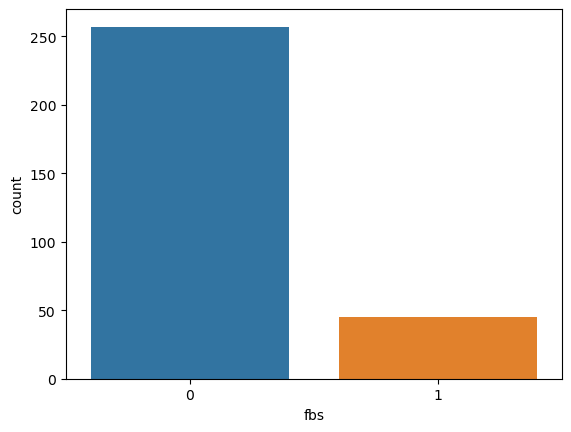

In [ ]:
# fbs Column
sns.countplot(x= df['fbs'])

sugar = round (df['fbs'].value_counts().values[0]/302*100)


# Observation
print('out of 302 {} % patients have high sugar level'.format(sugar))


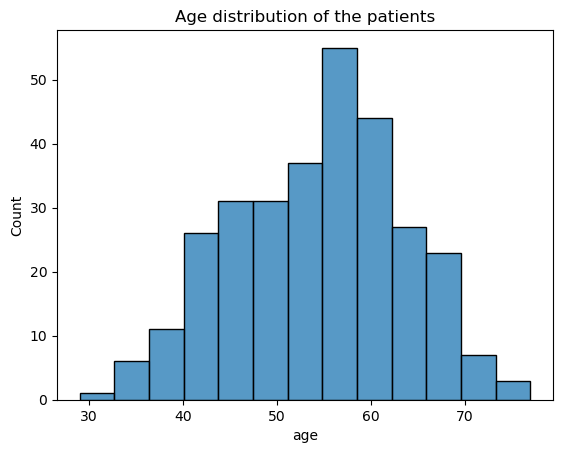

In [ ]:
# A histogram is a graph showing frequency distributions.
# It is a graph showing the number of observations within each given interval.

#Age
sns.histplot(df.age)
plt.title('Age distribution of the patients')
plt.savefig('age.png')
plt.show()

The dataset contains information about older patients, which is to be expected. The majority of the patients are older than 40.  The peak is at 57-58 years old.

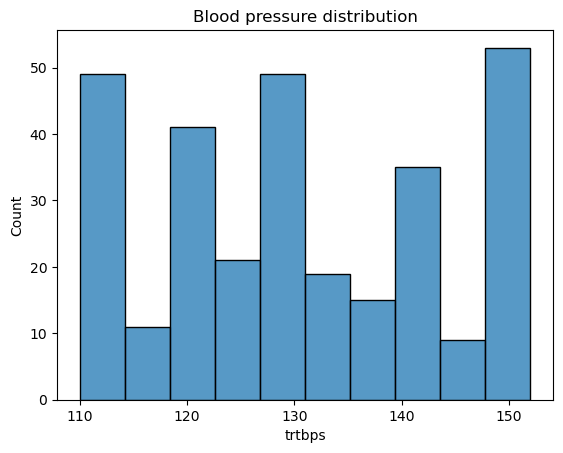

In [ ]:
#Resting blood pressure
sns.histplot(df.trtbps)
plt.title('Blood pressure distribution')
plt.show()

According to the European Society of Cardiology, the following classification for blood pressure is applied:

        Category           Blood pressure

        Optimal	              < 120

        Normal	              120–129

        High normal	         130–139

        Grade 1 hypertension	140–159

        Grade 2 hypertension	160–179

        Grade 3 hypertension	 ≥ 180

In our dataset, the resting blood pressure distribution has a peak at a value of approx. 150

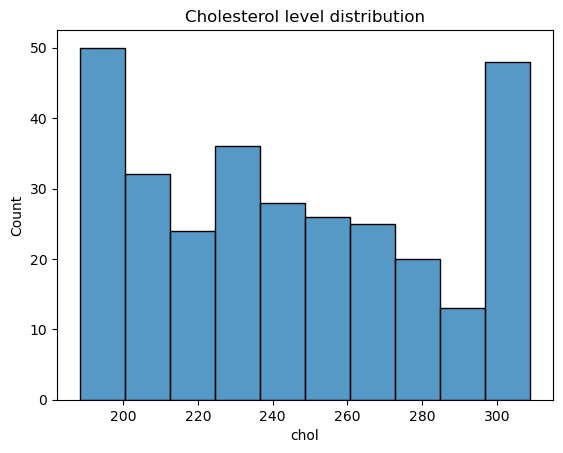

In [ ]:
#Cholesterol
sns.histplot(df.chol)
plt.title('Cholesterol level distribution')
plt.show()

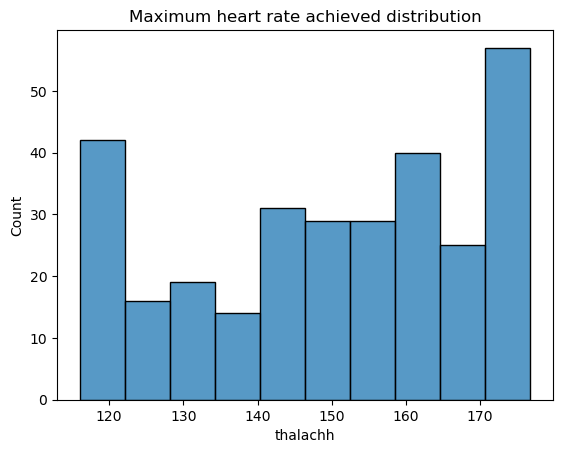

In [ ]:
#Maximum heart rate achieved
sns.histplot(df.thalachh)
plt.title('Maximum heart rate achieved distribution')
plt.show()

## Bivariate Analysis

<Axes: xlabel='sex', ylabel='chol'>

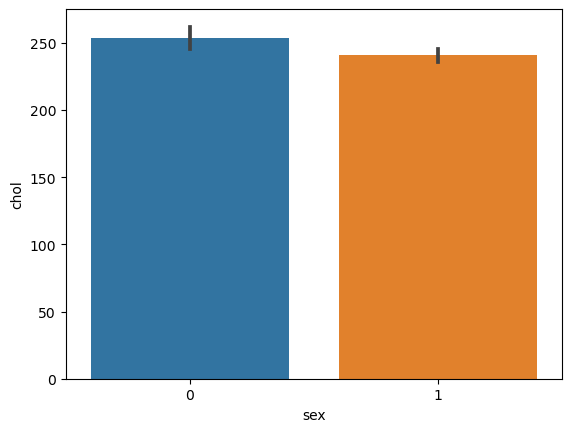

In [ ]:
# Barplot is useful for comparing the mean value of a numerical variable across different categories
sns.barplot(x='sex',y='chol',data=df)

<Axes: xlabel='age', ylabel='trtbps'>

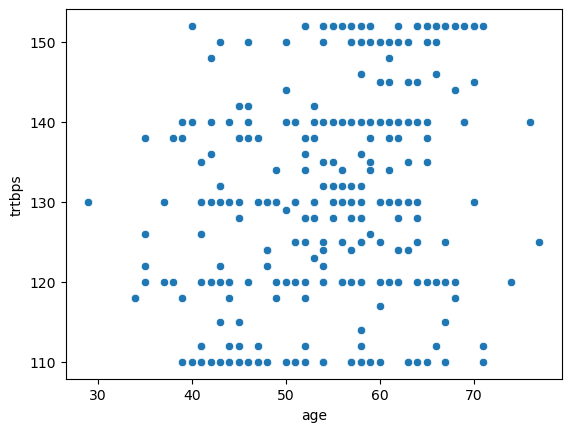

In [ ]:
#Create Scatterplot
# It is used to obtain the correlational relationship between two numerical variables.
sns.scatterplot(x='age',y='trtbps',data=df)

# Correlation
It is used to find how strong a relationship is between two variable, its Value lies in (-1 to 1)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

Text(0.5, 1.0, 'Correlation map')

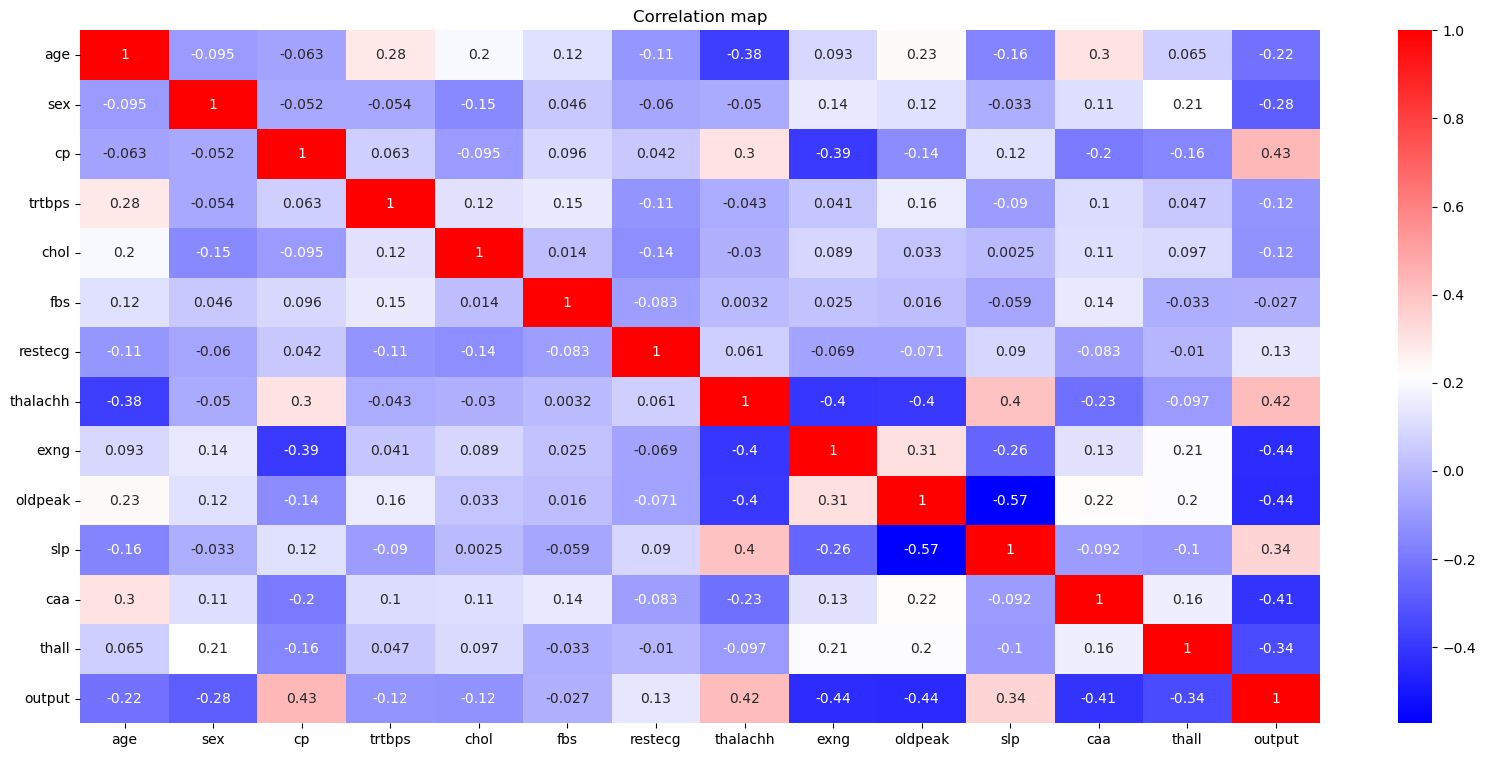

In [ ]:
# Heatmap is use to display correlation between different variable
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

From the above heatmap we can observe that the features 'cp', 'thalachh', 'exng', 'oldpeak' and 'caa' are highly correlated to output (target variable).

In [ ]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1


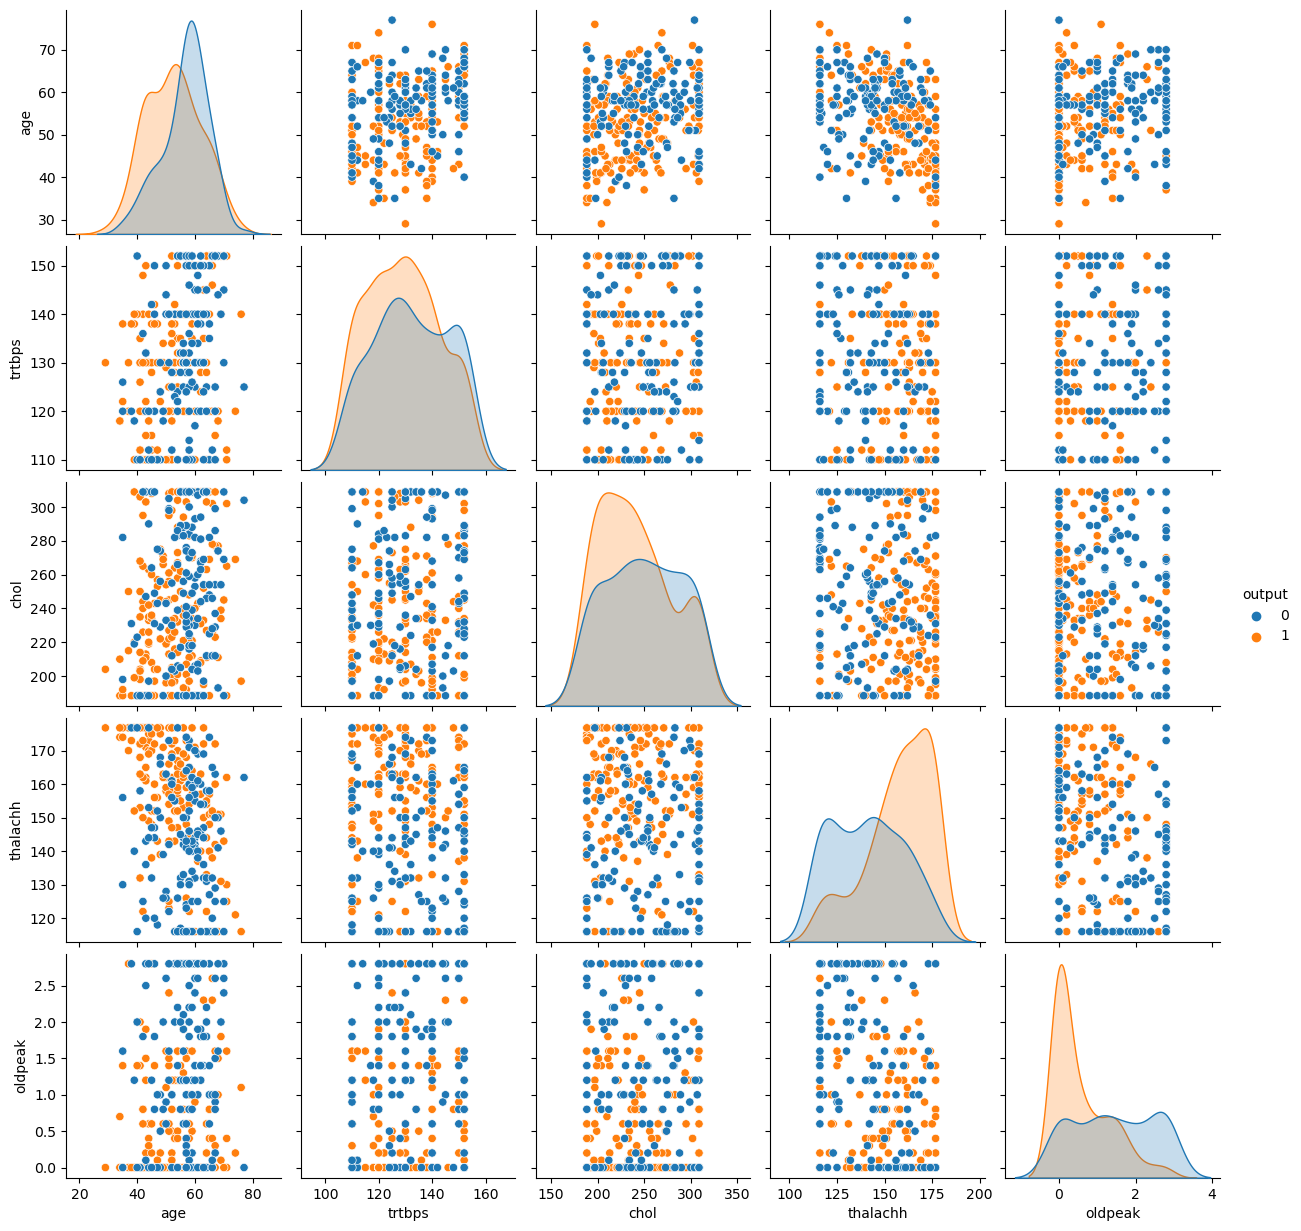

In [ ]:
# It is use to plot pairwise relationships between variables within a dataset.
# it is applicable to numeric columns only.

sns.pairplot(df[['age','trtbps','chol','thalachh','oldpeak','output']],hue='output')   #name of dependent variable

From the above pair plot we can conclude that our dataset is not linearly separable.




# Conclusion  (Visualization):

1.The majority of the patients are older than 40.

2.In the dataset there are 2 times more males than females.

3.54.3% of the patients have a high risk of heart attack, 45.7% - low risk of a heart attack.

4.Age distribution of patients from the high-risk group has a peak at 57-58 ages.

5.The major factors influencing heart attacks are: Chest pain, Maximum heart rate achieved, Exercise induced angina, ST depression induced by exercise relative to rest and Number of major vessels

# Feature Scaling

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,176.8,0,2.8,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,176.8,0,0.8,2,0,2,1
4,57,0,0,120.0,308.9,0,1,163.0,1,0.6,2,0,2,1


In [ ]:
from sklearn.preprocessing import StandardScaler  # Standarization
# from sklearn.preprocessing import MinMaxScaler  # Normalization

scale = StandardScaler()
# scale = MinMaxScaler()
df[['age','trtbps','chol','thalachh','oldpeak']]=scale.fit_transform(df[['age','trtbps','chol','thalachh','oldpeak']])

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,1.064668,-0.298585,1,0,0.000372,0,1.367483,0,0,1,1
1,-1.928548,1,2,-0.038476,0.135392,0,1,1.369395,0,1.880247,0,0,2,1
2,-1.485726,0,1,-0.038476,-1.038899,0,0,1.124197,0,0.444509,2,0,2,1
3,0.174856,1,1,-0.773906,-0.222001,0,1,1.369395,0,-0.170808,2,0,2,1
4,0.285561,0,0,-0.773906,1.638995,0,1,0.664450,1,-0.375914,2,0,2,1


# Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [ ]:
#split dataset in features and target variable

feature_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg','fbs','thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[feature_cols] # Features
y = df.output # Target variable

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: output, Length: 302, dtype: int64

So, we are preparing the data by spliting the features as X and Y ,Here X defines the feature columns and Y defines the target variable

In [ ]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [ ]:
X_train.shape

(241, 13)

In [ ]:
 X_test.shape

(61, 13)

Here splitting the dataset into train set and test set with the size of 80% and 20%